In [358]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates
from scipy.interpolate import interp1d
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

# ALL P3 data

In [359]:
basedir = 'data/P3_2017/LGS'
# infile = 'OIB_P3_exportfromGeosoft.csv'
infile = 'OIB_2017_LGS_level2.csv'
df = pd.read_csv(os.path.join(basedir, infile))
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))
df.head()

,Line,UTCDate,UTCTime_sec,UTCTime_hms,unixtime,Latitude,Longitude,H_Ell,Pitch,Roll,...,Z_mgal,static_st,Z_mgal_shift,Z_mgal_tempcorr,empcorrection,oib,diff_oib_tempcorr,diff_oib_shift,diff_oib_zbias,datestring
unixtime,,,,,,,,,,,,,,,,,,,,,
2017-03-22 10:40:39,D2001,2017/03/22,38439,10:40:39,1490179239,76.535019,-68.721937,82.343,0.177262,-0.347333,...,-20.15667,-23.9,8.74333,7.138588,1.604742,5.983501,-1.155087,-2.759829,26.140171,2017-03-22 10:40:39
2017-03-22 10:40:40,D2001,2017/03/22,38440,10:40:40,1490179240,76.535019,-68.721937,82.342,0.176293,-0.347785,...,-20.09976,-23.9,8.80024,7.195070,1.605170,5.983499,-1.211572,-2.816741,26.083259,2017-03-22 10:40:40
2017-03-22 10:40:41,D2001,2017/03/22,38441,10:40:41,1490179241,76.535019,-68.721937,82.342,0.176672,-0.347510,...,-20.05018,-23.9,8.84982,7.243483,1.606337,5.983499,-1.259984,-2.866321,26.033679,2017-03-22 10:40:41
2017-03-22 10:40:42,D2001,2017/03/22,38442,10:40:42,1490179242,76.535019,-68.721937,82.342,0.177084,-0.347556,...,-20.00771,-23.9,8.89229,7.283191,1.609099,5.983499,-1.299692,-2.908791,25.991209,2017-03-22 10:40:42
2017-03-22 10:40:43,D2001,2017/03/22,38443,10:40:43,1490179243,76.535019,-68.721937,82.342,0.177439,-0.347258,...,-19.97222,-23.9,8.92778,7.317571,1.610209,5.983499,-1.334072,-2.944281,25.955719,2017-03-22 10:40:43


In [360]:
print("Shape is {}\n".format(df.shape))
print(df.keys())

Shape is (239777, 28)

Index(['Line', 'UTCDate', 'UTCTime_sec', 'UTCTime_hms', 'unixtime', 'Latitude',
       'Longitude', 'H_Ell', 'Pitch', 'Roll', 'Heading', 'NS', 'PDOP',
       'AccBiasX', 'AccBiasY', 'AccBiasZ', 'imu_temp_C', 'grav', 'Z_mgal',
       'static_st', 'Z_mgal_shift', 'Z_mgal_tempcorr', 'empcorrection', 'oib',
       'diff_oib_tempcorr', 'diff_oib_shift', 'diff_oib_zbias', 'datestring'],
      dtype='object')


### may need to adjust for kirsty's drift calc

In [361]:
pre_still = [-23.9, -24.7, -26.4, 10.6, 7.4, 81.1, -20.6]
# pre_still -= 5
print(pre_still)

[-23.9, -24.7, -26.4, 10.6, 7.4, 81.1, -20.6]


In [362]:
# df['grav4_70_shift'] = df['grav4_70']
# df['grav4_shift'] = df['grav']
# for i, ln in enumerate(df.Line.unique()):
#     print(i)
#     print(pre_still[i] - 5)
#     print(ln)
# #     # 1
# # #     df['grav4_70_shift'] = (df['grav4_70'] - (pre_still[i] - 5)).where(df['Line'] == ln)
# #     # 2
# #     my_query_index = df.where(df['Line'] == ln).index
# #     df['shift'].loc[my_query_index] = (pre_still[i] - 5)
#     # 3
#     df['grav4_70_shift'][df['Line'] == ln] = (df['grav4_70'] - (pre_still[i] - 5))
#     df['grav4_shift'][df['Line'] == ln] = (df['grav4'] - (pre_still[i] - 5))

# # print(len(df.where(df['Line'] == 'D2006')))    #, 10)

In [363]:
# fig, ax = plt.subplots(facecolor='white')
# # df['shift'].plot()
# # df['grav4_70'].plot()
# (df['grav4_shift'] - df['grav4']).plot()
# # df['grav4_shift'].plot()
# # df['grav4'].plot()
# (df['grav4_70_shift'] - df['grav4_70']).plot()


### For data that still has stills, mask out everythign below 100 m.

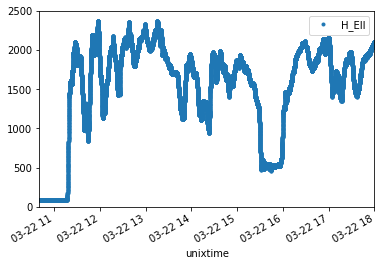

In [364]:
fig, ax = plt.subplots(facecolor='white')
df['H_Ell'].plot(style='.')
# df['grav_flight'].plot()
# df['oib_flight'].plot()
ax.set_xlim([df.index[0], '2017-03-22T18'])
ax.set_ylim([0, 2500])
plt.legend()

In [365]:
# #
# df['grav_flight'] = df['Z_mgal_shift'].where(df['H_Ell'] > 100)
# df['oib_flight'] = df['oib'].where(df['H_Ell'] > 100)
# df['temp_flight'] = df['imu_temp_C'].where(df['H_Ell'] > 100)
# df['time_flight'] = df['unixtime'].where(df['H_Ell'] > 100)
#
df = df[df['H_Ell'] > 480]
#
# df = df.query('H_Ell > 82.5 & H_Ell < 100')
# df = df.query('H_Ell > 500')

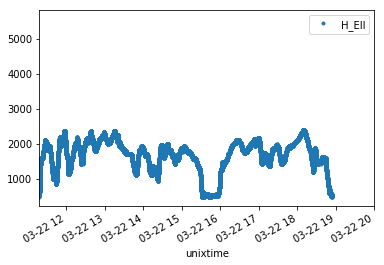

In [366]:
fig, ax = plt.subplots(facecolor='white')
df['H_Ell'].plot(style='.')
# df['grav_flight'].plot()
# df['oib_flight'].plot()
ax.set_xlim([df.index[0], '2017-03-22T20'])
# ax.set_ylim([82, 83])
plt.legend()

In [367]:
print("Shape is {}\n".format(df.shape))
df.head()

Shape is (174252, 28)



,Line,UTCDate,UTCTime_sec,UTCTime_hms,unixtime,Latitude,Longitude,H_Ell,Pitch,Roll,...,Z_mgal,static_st,Z_mgal_shift,Z_mgal_tempcorr,empcorrection,oib,diff_oib_tempcorr,diff_oib_shift,diff_oib_zbias,datestring
unixtime,,,,,,,,,,,,,,,,,,,,,
2017-03-22 11:18:02,D2001,2017/03/22,40682,11:18:02,1490181482,76.531701,-68.872500,487.472,8.048155,3.686519,...,-19.59674,-23.9,9.30326,5.571885,3.731375,-1.558773,-7.130658,-10.862033,18.037967,2017-03-22 11:18:02
2017-03-22 11:18:03,D2001,2017/03/22,40683,11:18:03,1490181483,76.531918,-68.875924,494.911,7.984196,4.630376,...,-19.78545,-23.9,9.11455,5.382379,3.732171,-1.666376,-7.048755,-10.780926,18.119074,2017-03-22 11:18:03
2017-03-22 11:18:04,D2001,2017/03/22,40684,11:18:04,1490181484,76.532142,-68.879357,502.166,7.638370,6.477546,...,-19.97325,-23.9,8.92675,5.193411,3.733339,-1.746574,-6.939985,-10.673324,18.226676,2017-03-22 11:18:04
2017-03-22 11:18:05,D2001,2017/03/22,40685,11:18:05,1490181485,76.532374,-68.882800,509.124,7.270370,8.599449,...,-20.15961,-23.9,8.74039,5.005884,3.734506,-1.814580,-6.820464,-10.554970,18.345030,2017-03-22 11:18:05
2017-03-22 11:18:06,D2001,2017/03/22,40686,11:18:06,1490181486,76.532618,-68.886248,515.712,7.200280,10.781926,...,-20.34371,-23.9,8.55629,4.821413,3.734877,-1.884714,-6.706126,-10.441004,18.458996,2017-03-22 11:18:06


### Calculate bias

In [368]:
# # introduce some floats in our x-values
# # df['imar_bias_70'] = df['grav4_70_shift'] - df['oib_10_11_12']
# df['imar_bias'] = df['grav_flight'] - df['oib_flight']
# df['imar_bias_orig'] = df['Z_mgal_shift'] - df['oib']
# df[['imar_bias', 'imar_bias_orig']].describe()
#
df['imar_bias'] = df['Z_mgal_shift'] - df['oib']
#
# df['imar_bias'] = df['Z_mgal_shift'] - df['Z_mgal_shift'][-60:].mean()

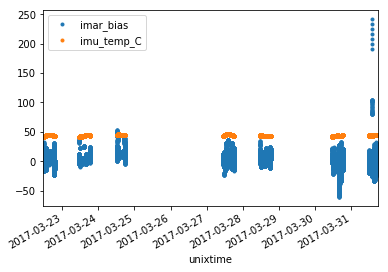

In [369]:
fig, ax = plt.subplots(facecolor='white')
df['imar_bias'].plot(style='.')
df['imu_temp_C'].plot(style='.')
# df['Heading'].plot(style='.')
# df['grav_flight'].plot()
# df['oib_flight'].plot()
# ax.set_xlim([df.index[0], '2017-03-22T20'])
# ax.set_ylim([0, 2500])
plt.legend()

In [370]:
# df = df.query('imar_bias < 80')
df = df[df['imar_bias'] < 80]

### Groupby Line

Text(0.5,0.98,'OIB_2017_LGS')

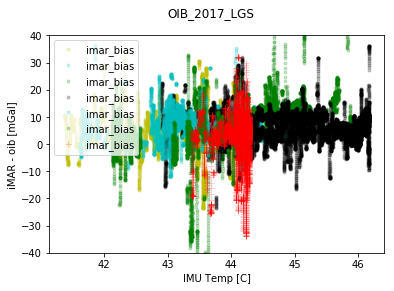

In [371]:
fig, ax = plt.subplots(facecolor='white')
my_alpha = 0.2
# plt.plot(df.imu_temp_C, df.imar_bias, 'grey', alpha=0.5)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2001'), 'y.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2002'), 'c.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2003'), 'g.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2004'), 'k.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2005'), 'c.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2007'), 'g.', alpha=my_alpha)
plt.plot(df.imu_temp_C, df.imar_bias.where(df['Line'] == 'D2008'), 'r+', alpha=my_alpha)
# plt.xlim((41, 45))
plt.ylim((-40, 40))
plt.xlabel('IMU Temp [C]')
plt.ylabel('iMAR - oib [mGal]')
plt.legend(loc="upper left")
plt.suptitle(infile[:12])
# plt.savefig('figs/' + infile[:12] + '_2ndOrderOLS_reults.png')

In [372]:
gb = df.groupby('Line')

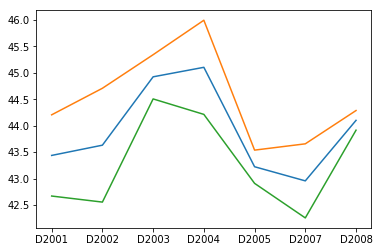

In [373]:
plt.plot(gb['imu_temp_C'].mean())
plt.plot(gb['imu_temp_C'].mean() + gb['imu_temp_C'].std())
plt.plot(gb['imu_temp_C'].mean() - gb['imu_temp_C'].std())

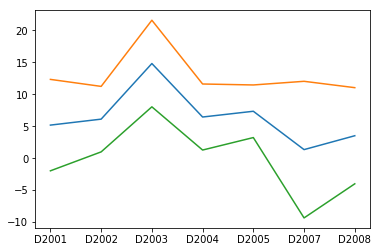

In [374]:
plt.plot(gb['imar_bias'].mean())
plt.plot(gb['imar_bias'].mean() + gb['imar_bias'].std())
plt.plot(gb['imar_bias'].mean() - gb['imar_bias'].std())

r value 0.608542748444
p_value 0.147041293538
standard deviation 1.79840973942


Text(0,0.5,'MEAN Bias [mGal]')

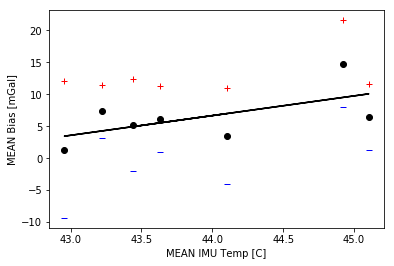

In [375]:
# w = np.linalg.lstsq(gb['imu_temp_C'].mean().T, gb['imar_bias'].mean())[0] # obtaining the parameters

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(gb['imu_temp_C'].mean(), gb['imar_bias'].mean())
print('r value', r_value)
print('p_value', p_value)
print('standard deviation', std_err)

line = slope * gb['imu_temp_C'].mean() + intercept
plt.plot(gb['imu_temp_C'].mean(), line, 'k-', gb['imu_temp_C'].mean(), gb['imar_bias'].mean(),'ko')
plt.plot(gb['imu_temp_C'].mean(), gb['imar_bias'].mean() + gb['imar_bias'].std(), 'r+')
plt.plot(gb['imu_temp_C'].mean(), gb['imar_bias'].mean() - gb['imar_bias'].std(), 'b_')
plt.xlabel('MEAN IMU Temp [C]')
plt.ylabel('MEAN Bias [mGal]')
# plt.savefig('figs/regression_FlightMean_Temp-vs-Bias.png')

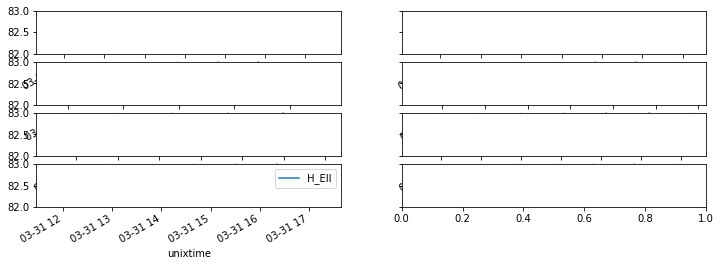

In [376]:
ncols=2
nrows = int(np.ceil(gb.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,4), sharey=True)

# for key in gb.groups.keys():
for (key, ax) in zip(gb.groups.keys(), axes.flatten()):
    gb.get_group(key)['H_Ell'].plot(ax=ax)
    ax.set_ylim([82, 83])

ax.legend()
plt.show()

In [377]:
print(gb.groups['D2001'])
print(gb.get_group('D2001').head())
# gb.get_group('D2001')['H_Ell'].plot(ax=ax)

DatetimeIndex(['2017-03-22 11:18:02', '2017-03-22 11:18:03',
               '2017-03-22 11:18:04', '2017-03-22 11:18:05',
               '2017-03-22 11:18:06', '2017-03-22 11:18:07',
               '2017-03-22 11:18:08', '2017-03-22 11:18:09',
               '2017-03-22 11:18:10', '2017-03-22 11:18:11',
               ...
               '2017-03-22 18:54:06', '2017-03-22 18:54:07',
               '2017-03-22 18:54:08', '2017-03-22 18:54:09',
               '2017-03-22 18:54:10', '2017-03-22 18:54:11',
               '2017-03-22 18:54:12', '2017-03-22 18:54:13',
               '2017-03-22 18:54:14', '2017-03-22 18:54:15'],
              dtype='datetime64[ns]', name='unixtime', length=8508, freq=None)
                      Line     UTCDate  UTCTime_sec UTCTime_hms    unixtime  \
unixtime                                                                      
2017-03-22 11:18:02  D2001  2017/03/22        40682    11:18:02  1490181482   
2017-03-22 11:18:03  D2001  2017/03/22        40683   

/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


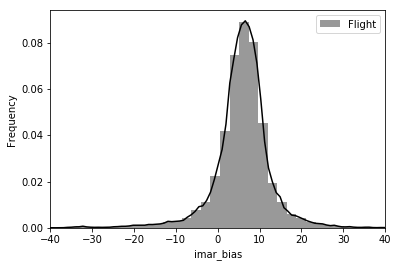

In [378]:
import seaborn as sns
fig, ax = plt.subplots(facecolor='white')
ax = sns.distplot(df['imar_bias'].dropna(), kde=True, color='black', label='Flight')
ax.set_xlim([-40, 40])
ax.set_ylabel('Frequency')
plt.legend()

## LOWESS smoothing

In [381]:
x = df['unixtime']
# x = df['imu_temp_C']
y = df['imar_bias']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.5
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [382]:
# df_temp['imar_bias_lowess'] = np.squeeze(lowess_y)
data=np.array([lowess_x, lowess_y]).T
lowess_index = pd.to_datetime(lowess_x,unit='s')
df_lowess = pd.DataFrame(data=data, index=lowess_index, columns=['unixtime','imar_bias_lowess'])
df_lowess.head()

# df['imar_bias_lowess'] = lowess_y

,unixtime,imar_bias_lowess
2017-03-22 11:18:02,1.490181e+09,4.729025
2017-03-22 11:18:03,1.490181e+09,4.729062
2017-03-22 11:18:04,1.490181e+09,4.729099
2017-03-22 11:18:05,1.490181e+09,4.729136
2017-03-22 11:18:06,1.490181e+09,4.729173


(-10, 30)

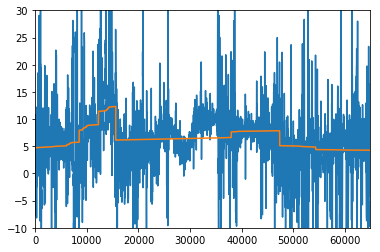

In [383]:
fig, ax = plt.subplots(facecolor='white')
pd.merge_ordered(df, df_lowess, fill_method='ffill')['imar_bias'].plot()
pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')['imar_bias_lowess'].plot()
ax.set_ylim([-10, 30])

In [384]:
df = pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df.set_index(pd.to_datetime(df['datestring'],unit='s'), inplace=True)
df.head()

,Line,UTCDate,UTCTime_sec,UTCTime_hms,unixtime,Latitude,Longitude,H_Ell,Pitch,Roll,...,Z_mgal_shift,Z_mgal_tempcorr,empcorrection,oib,diff_oib_tempcorr,diff_oib_shift,diff_oib_zbias,datestring,imar_bias,imar_bias_lowess
datestring,,,,,,,,,,,,,,,,,,,,,
2017-03-22 11:18:02,D2001,2017/03/22,40682,11:18:02,1490181482,76.531701,-68.872500,487.472,8.048155,3.686519,...,9.30326,5.571885,3.731375,-1.558773,-7.130658,-10.862033,18.037967,2017-03-22 11:18:02,10.862033,4.729025
2017-03-22 11:18:03,D2001,2017/03/22,40683,11:18:03,1490181483,76.531918,-68.875924,494.911,7.984196,4.630376,...,9.11455,5.382379,3.732171,-1.666376,-7.048755,-10.780926,18.119074,2017-03-22 11:18:03,10.780926,4.729062
2017-03-22 11:18:04,D2001,2017/03/22,40684,11:18:04,1490181484,76.532142,-68.879357,502.166,7.638370,6.477546,...,8.92675,5.193411,3.733339,-1.746574,-6.939985,-10.673324,18.226676,2017-03-22 11:18:04,10.673324,4.729099
2017-03-22 11:18:05,D2001,2017/03/22,40685,11:18:05,1490181485,76.532374,-68.882800,509.124,7.270370,8.599449,...,8.74039,5.005884,3.734506,-1.814580,-6.820464,-10.554970,18.345030,2017-03-22 11:18:05,10.554970,4.729136
2017-03-22 11:18:06,D2001,2017/03/22,40686,11:18:06,1490181486,76.532618,-68.886248,515.712,7.200280,10.781926,...,8.55629,4.821413,3.734877,-1.884714,-6.706126,-10.441004,18.458996,2017-03-22 11:18:06,10.441004,4.729173


Text(0,0.5,'$mGal$')

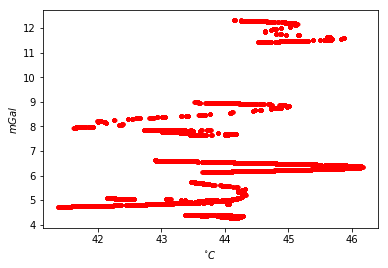

In [385]:
# plt.plot(df['imu_temp_C'].shift(periods=1, freq=lag_argmax), df['imar_bias'])
fig, ax = plt.subplots(facecolor='white')
# plt.plot(df['imu_temp_C'], df['imar_bias'], 'k.')
plt.plot(df['imu_temp_C'], df['imar_bias_lowess'], 'r.')
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

## Regression Models

In [386]:
df.corr()['imar_bias_lowess']

UTCTime_sec          0.175214
Latitude             0.057900
Longitude            0.265678
H_Ell                0.475497
Pitch               -0.064993
Roll                 0.000745
Heading             -0.215013
NS                   0.030523
PDOP                 0.041297
AccBiasX             0.009660
AccBiasY            -0.107642
AccBiasZ            -0.212754
imu_temp_C           0.143813
grav                -0.212961
Z_mgal              -0.212754
static_st           -0.227109
Z_mgal_shift        -0.083948
Z_mgal_tempcorr     -0.088436
empcorrection        0.143813
oib                 -0.146577
diff_oib_tempcorr   -0.323981
diff_oib_shift      -0.347227
diff_oib_zbias       0.163937
imar_bias            0.347227
imar_bias_lowess     1.000000
Name: imar_bias_lowess, dtype: float64

In [388]:
import statsmodels.formula.api as smf

ols=smf.ols('imar_bias_lowess ~ imu_temp_C', data=df).fit()
print(ols.summary())
# ols.save('ols_results_OIB-P3_ALL_FINAL.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1369.
Date:                Wed, 30 May 2018   Prob (F-statistic):          1.27e-296
Time:                        17:41:24   Log-Likelihood:            -1.2968e+05
No. Observations:               64837   AIC:                         2.594e+05
Df Residuals:                   64835   BIC:                         2.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1099      0.283    -14.546      0.0

In [389]:
# 2nd order polynomial
poly_2 = smf.ols('imar_bias_lowess ~ 1 + imu_temp_C + I(imu_temp_C ** 2.0)', data=df).fit()
print(poly_2.summary())
# poly_2.save('poly_2_results_OIB-P3_ALL_FINAL.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     705.2
Date:                Wed, 30 May 2018   Prob (F-statistic):          1.01e-303
Time:                        17:41:29   Log-Likelihood:            -1.2966e+05
No. Observations:               64837   AIC:                         2.593e+05
Df Residuals:                   64834   BIC:                         2.594e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.1407 

In [390]:
poly_3 = smf.ols('imar_bias_lowess ~ 1 \
                + imu_temp_C \
                + I(imu_temp_C ** 2.0) \
                + I(imu_temp_C ** 3.0)', 
                 data=df).fit()
print(poly_3.summary())
# poly_3.save('poly_3_results_OIB-P3_ALL_FINAL.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     539.2
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        17:41:31   Log-Likelihood:            -1.2956e+05
No. Observations:               64837   AIC:                         2.591e+05
Df Residuals:                   64833   BIC:                         2.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5126.1565 

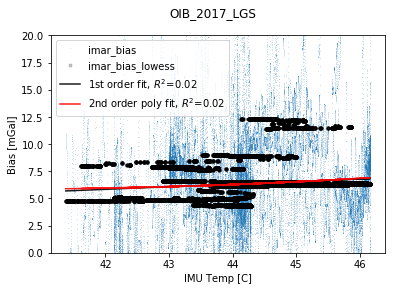

In [391]:
fig, ax = plt.subplots(facecolor='white')
plt.plot(df.imu_temp_C, df.imar_bias, ',', alpha=0.2)
plt.plot(df.imu_temp_C, df.imar_bias_lowess, 'k.', alpha=0.2)
plt.plot(df.imu_temp_C, ols.predict(df), 'k-', 
         label='1st order fit, $R^2$=%.2f' % ols.rsquared, 
         alpha=0.9)
plt.plot(df.imu_temp_C, poly_2.predict(df), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
# plt.plot(df.temp_flight, poly_3.predict(df), 'g-', 
#          label='3rd order poly fit, $R^2$=%.2f' % poly_3.rsquared, 
#          alpha=0.9)
# plt.xlim((41, 45))
plt.ylim((0, 20))
plt.xlabel('IMU Temp [C]')
plt.ylabel('Bias [mGal]')
plt.legend(loc="upper left")
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_2ndOrderOLS_reults.png')

Text(0.5,0.98,'OIB_2017_LGS')

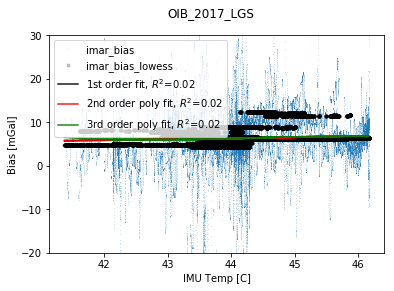

In [393]:
fig, ax = plt.subplots(facecolor='white')
plt.plot(df.imu_temp_C, df.imar_bias, ',', alpha=0.2)
plt.plot(df.imu_temp_C, df.imar_bias_lowess, 'k.', alpha=0.2)
plt.plot(df.imu_temp_C, ols.predict(df), 'k-', 
         label='1st order fit, $R^2$=%.2f' % ols.rsquared, 
         alpha=0.9)
plt.plot(df.imu_temp_C, poly_2.predict(df), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
plt.plot(df.imu_temp_C, poly_3.predict(df), 'g-', 
         label='3rd order poly fit, $R^2$=%.2f' % poly_3.rsquared, 
         alpha=0.9)
# plt.xlim((40, 47))
plt.ylim((-20, 30))
plt.xlabel('IMU Temp [C]')
plt.ylabel('Bias [mGal]')
plt.legend(loc="upper left")
plt.suptitle(infile[:12])
# plt.savefig('figs/' + infile[:12] + '_2ndOrderOLS_reults.png')

Text(0.5,0.98,'OIB_2017_LGS')

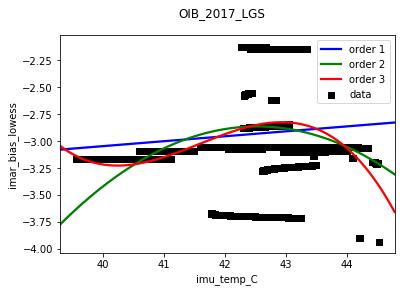

In [282]:
import seaborn as sns
# #
# fig, ax = plt.subplots(facecolor='white')
# plt.scatter(df['temp_flight'], df['imar_bias'], label='data', color='black', marker=',')
# sns.regplot(x='temp_flight', y='imar_bias', data=df, 
#             order=1, 
#             color='blue', scatter=None, label='order 1')
# sns.regplot(x='temp_flight', y='imar_bias', data=df, 
#             order=2, 
#             color='green', scatter=None, label='order 2')
# sns.regplot(x='temp_flight', y='imar_bias', data=df, 
#             order=3, 
#             color='red', scatter=None, label='order 3')
# plt.legend()
# plt.suptitle(infile[:12])
# plt.savefig('figs/' + infile[:12] + '_test_regression_order3.png')
# #
import seaborn as sns
fig, ax = plt.subplots(facecolor='white')
plt.scatter(df['imu_temp_C'], df['imar_bias_lowess'], label='data', color='black', marker=',')
sns.regplot(x='imu_temp_C', y='imar_bias_lowess', data=df, 
            order=1, 
            color='blue', scatter=None, label='order 1')
sns.regplot(x='imu_temp_C', y='imar_bias_lowess', data=df, 
            order=2, 
            color='green', scatter=None, label='order 2')
sns.regplot(x='imu_temp_C', y='imar_bias_lowess', data=df, 
            order=3, 
            color='red', scatter=None, label='order 3')
plt.legend()
plt.suptitle(infile[:12])
# plt.savefig('figs/' + infile[:12] + '_test_regression_order3.png')

### Edit out flight 7

In [ ]:
df['imar_bias_edit'] = (df['grav_flight'] - df['oib_flight']).where(df['Line'] != 'D2007')
df['temp_flight_edit'] = (df['temp_flight']).where(df['Line'] != 'D2007')

In [ ]:
ols=smf.ols('imar_bias ~ temp_flight', data=df).fit()
print(ols.summary())

In [ ]:
# introduce some floats in our x-values
# df['imar_bias_70'] = df['grav4_70_shift'] - df['oib_10_11_12']
df['imar_bias'] = df['grav_flight'] - df['oib_flight']
df['imar_bias_orig'] = df['Z_mgal_shift'] - df['oib']
# df[['imar_bias', 'imar_bias_70']].describe()

In [ ]:
df.shape